In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
sns.set(color_codes=True)

In [15]:
results_df_1 = pd.read_csv('HyperParameter_Results.csv')
results_df_2 = pd.read_csv('HyperParameter_Results_2.csv')
results_df = pd.concat([results_df_1, results_df_2])

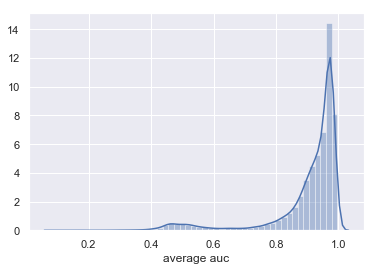

In [17]:
sns.distplot(results_df['average auc'])